# Прогнозирование временных рядов при помощи машинного обучения. Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Предобработка временного ряда

Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [3]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [4]:
df.shape

(10227, 10)

Оставим только целевой ряд (`quantity`)

In [5]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


In [6]:
ts.shape

(146, 1)

Посмотрим как ведет себя временной ряд

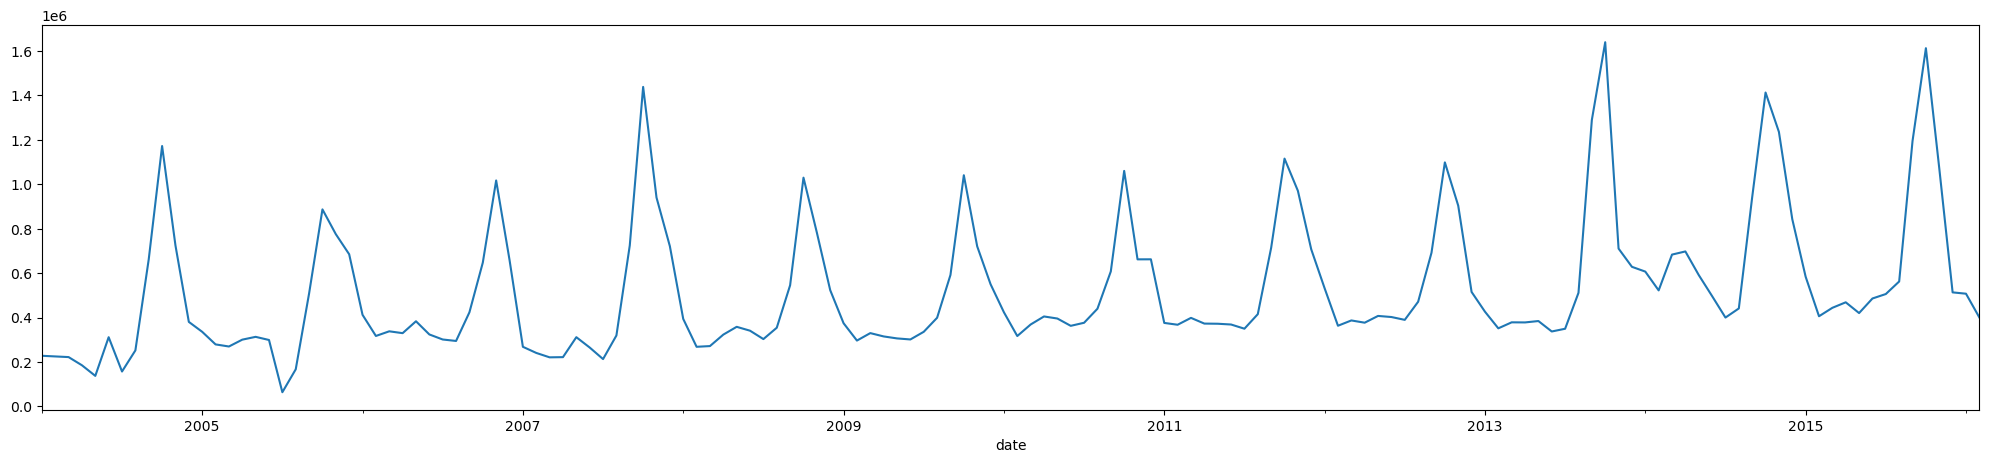

In [7]:
ts.quantity.plot(figsize=(25,5));

## Машинное обучение для прогнозирования временных рядов

## Задание

Извлеките первые 7 лаговых признаков из ряда (лаг на 1, 2 ... 7 месяцев).

Чему равно первое (самое старое) известное значение лага 4 периода назад? Ответ округлите до целого числа.

In [8]:
for i in range(1, 8):
    ts[f'lag_{i}'] = ts['quantity'].shift(i)

In [9]:
ts.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2004-01,227832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,225133,227832.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-03,221952,225133.0,227832.0,NaN,NaN,NaN,NaN,NaN
2004-04,185150,221952.0,225133.0,227832.0,NaN,NaN,NaN,NaN
2004-05,137390,185150.0,221952.0,225133.0,227832.0,NaN,NaN,NaN


In [10]:
ts.tail()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2015-10,1612160,1194608.0,562187.0,505717.0,485652.0,420072.0,468522.0,443687.0
2015-11,1071872,1612160.0,1194608.0,562187.0,505717.0,485652.0,420072.0,468522.0
2015-12,513186,1071872.0,1612160.0,1194608.0,562187.0,505717.0,485652.0,420072.0
2016-01,507223,513186.0,1071872.0,1612160.0,1194608.0,562187.0,505717.0,485652.0
2016-02,400359,507223.0,513186.0,1071872.0,1612160.0,1194608.0,562187.0,505717.0


In [11]:
ts.shape

(146, 8)

Выкиньте строчки с пропущенными значениями.

In [12]:
ts.dropna(inplace=True)

In [13]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 139 entries, 2004-08 to 2016-02
Freq: M
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  139 non-null    int64  
 1   lag_1     139 non-null    float64
 2   lag_2     139 non-null    float64
 3   lag_3     139 non-null    float64
 4   lag_4     139 non-null    float64
 5   lag_5     139 non-null    float64
 6   lag_6     139 non-null    float64
 7   lag_7     139 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.8 KB


In [14]:
ts.shape

(139, 8)

In [15]:
ts.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date,,,,,,,,
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0
2004-10,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0
2004-11,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0
2004-12,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0


### Разбиение на train и test для временных рядов

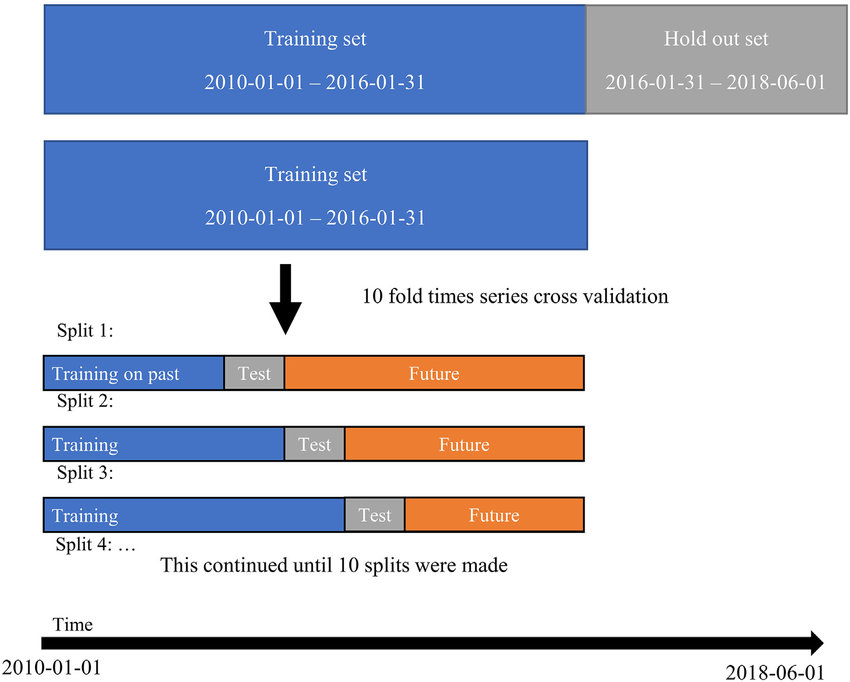

## Задание

Разбейте данные (quantity) на train и test.

train - первые 85% данных

test - следующие 15% данных

Сколько измерений попало в тестовую часть?

In [16]:
ts.shape[0] * 0.85

118.14999999999999

In [17]:
split_index = int(0.85*len(ts))
print(f"split index = {split_index}")

split index = 118


In [18]:
Train = ts.iloc[:split_index]
Test = ts.iloc[split_index:]

print(Train.shape)
print(Test.shape)

(118, 8)
(21, 8)


## Задание

Разбейте тренировочные и тестовые данные на матрицы объект-признак `X_train`, `X_test` и векторы с целевой переменной `y_train`, `y_test`.

Чему равно среднее значение `y_test`? Ответ округлите до целого числа

In [19]:
X_train = Train.drop(['quantity'], axis=1)
y_train = Train.quantity

X_test = Test.drop(['quantity'], axis=1)
y_test = Test.quantity

In [20]:
y_test.mean()

711637.0

## Прогнозирование временных рядов

Обратите внимание, что в функции мы сами по индексу разбили датасет на обучающую и валидационную выборку для обучения моделей. Мы не можем воспользовать train_test_split, так как нам необходимо сохранять хронологию в деление выборки на части, т.е. случайное сэмплирование наблюдений нам не подойдет, в частности, т.к. мы хотим выучить тренд в данных.

## Задание

Обучите линейную регрессию на тренировочных данных и посчитайте $R^2$ на тесте.

Ответ округлите до сотых.

In [21]:
X_train.shape

(118, 7)

In [22]:
X_test.shape

(21, 7)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)
r2_score_lr = r2_score(y_test, pred_lr)
print(f"r2 = {r2_score_lr}")

r2 = 0.5010248271570559


## Агрегированные признаки

Используем функцию, которая возвращает словарь, где ключами являются уникальные категории признака `cat_feature`, а значениями - средние по `real_feature`.

In [24]:
ts.shape

(139, 8)

In [25]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [26]:
ts['month'] = ts.index.month
ts.head()

,quantity,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,month
date,,,,,,,,,
2004-08,251984,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,8
2004-09,662382,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,9
2004-10,1171846,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,10
2004-11,724140,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,11
2004-12,380379,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,12


In [ ]:
ts.month

In [27]:
ts.shape

(139, 9)

## Задание

Создайте колонку `month`, содержащую месяц (из даты).

Вычислите среднее значение целевой переменной по месяцам (по всем обучающим данным до разбиения на train и test).

В какой месяц года среднее количество проданного товара максимально? В ответе укажите номер месяца.

In [31]:
# pd.Series(month_dict, index=month_dict.keys()).sort_values(ascending=False)

Далее будем использовать функцию preprocess_data.

В функции мы:

1) Разбиваем данные на тренировочную и тестовую части

2) Генерируем лаговые признаки

3) Генерируем агрегированные признаки

In [32]:
dfBang

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01
...,...,...,...,...,...,...,...,...,...,...
2015-10,BANGALORE,October,2015,1612160,385,3365,2215,KNT,BANGALORE,2015-10-01
2015-11,BANGALORE,November,2015,1071872,205,3138,1618,KNT,BANGALORE,2015-11-01
2015-12,BANGALORE,December,2015,513186,217,2030,1343,KNT,BANGALORE,2015-12-01


In [29]:
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [33]:
ts.shape

(146, 1)

In [34]:
index_cut = int(0.815*len(ts))
print(index_cut)

118


In [35]:
def preprocess_data(data, lag_start=1, lag_end=8, index_cut=index_cut):
    data = pd.DataFrame(data.copy())

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['quantity'].shift(i)

    data = data.dropna()

    data["month"] = data.index.month

    # считаем средние только по тренировочной части, чтобы избежать лика (data leak)
    data["month_average"] = list(map(code_mean(data.iloc[:index_cut], "month", "quantity").get, data.month))

    # выкидываем закодированные средними признаки
    data.drop(["month"], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.iloc[:index_cut].drop(["quantity"], axis=1)
    y_train = data.iloc[:index_cut]["quantity"]
    X_test = data.iloc[index_cut:].drop(["quantity"], axis=1)
    y_test = data.iloc[index_cut:]["quantity"]

    return X_train, X_test, y_train, y_test

In [36]:
X_train, X_test, y_train, y_test = preprocess_data(ts)

X_train.shape, X_test.shape

((118, 8), (21, 8))

In [40]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,month_average
date,,,,,,,,
2004-08,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,362241.8
2004-09,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,675778.1
2004-10,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,1112561.2
2004-11,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,820510.3
2004-12,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,603110.6
...,...,...,...,...,...,...,...,...
2014-01,628220.0,710266.0,1639032.0,1289187.0,511174.0,349474.0,337186.0,414864.5
2014-02,606710.0,628220.0,710266.0,1639032.0,1289187.0,511174.0,349474.0,332206.9
2014-03,522132.0,606710.0,628220.0,710266.0,1639032.0,1289187.0,511174.0,364535.8


In [37]:
X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])

0.8489208633093526

In [38]:
X_train.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,month_average
date,,,,,,,,
2004-08,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,362241.8
2004-09,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,675778.1
2004-10,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,1112561.2
2004-11,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,820510.3
2004-12,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,603110.6


## Задание

Обучите линейную регрессию на подготовленных тренировочных данных и выведите $R^2$ на тесте.

Ответ округлите до сотых.

In [39]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)
r2_score_lr = r2_score(y_test, pred_lr)
print(f"r2 = {r2_score_lr}")

r2 = 0.7439158650185003


## Задание

Заново разбейте данные на train и test, используя `preprocess_data` с лагами от 1 до 12 включительно.

Обучите линейную регрессию. Чему теперь равен $R^2$? Ответ округлите до сотых.

In [59]:
X_train, X_test, y_train, y_test = preprocess_data(ts, lag_start=1, lag_end=12)

X_train.shape, X_test.shape

((118, 12), (17, 12))

In [60]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)
r2_score_lr = r2_score(y_test, pred_lr)
print(f"r2 = {r2_score_lr}")

r2 = 0.859115264065872


## Задание

Обучите CatBoostRegressor с гиперпараметрами по умолчанию на тех же данных, что и линейную регрессию из предыдущего задания. Чему теперь равен $R^2$? Ответ округлите до десятых.

In [61]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,month_average
date,,,,,,,,,,,,
2004-12,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,227832.0,603110.6
2005-01,380379.0,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,225133.0,414864.5
2005-02,335679.0,380379.0,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,221952.0,332206.9
2005-03,279047.0,335679.0,380379.0,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,185150.0,364535.8
2005-04,269609.0,279047.0,335679.0,380379.0,724140.0,1171846.0,662382.0,251984.0,157022.0,311445.0,137390.0,371940.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05,697423.0,683236.0,522132.0,606710.0,628220.0,710266.0,1639032.0,1289187.0,511174.0,349474.0,337186.0,382211.6
2014-06,591250.0,697423.0,683236.0,522132.0,606710.0,628220.0,710266.0,1639032.0,1289187.0,511174.0,349474.0,349681.3
2014-07,496447.0,591250.0,697423.0,683236.0,522132.0,606710.0,628220.0,710266.0,1639032.0,1289187.0,511174.0,308152.9


In [62]:
from catboost import CatBoostRegressor

model_cb = CatBoostRegressor()
model_cb.fit(X_train, y_train, silent=True)
pred_cb = model_cb.predict(X_test)

r2_score_cb = r2_score(y_test, pred_cb)
print(f"r2 catboost = {r2_score_cb}")

r2 catboost = 0.6115594538881034


## Бонусное задание (не проверяется тестами)

Попробуйте использовать в качестве экзогенного фактора `priceMod` из исходных данных.

Также пробуйте любые модели регрессии и любые наборы гиперпараметров.

Единственное требование: в тесте - те же 21 измерений.

Какого наилучшего значения $R^2$ на тесте вам удалось добиться?

In [ ]:
# your code here